In [1]:
import cv2
import numpy as np
from math import sqrt 
import numpy as np
from sys import exit
from PIL import Image
import matplotlib.pyplot as plt
import random

In [3]:
patchSize = 40      # rectangular patch with size patchSize*patchSize*channel
patchPerImg = 1000  # patches per image
numImage = 20       # number of images
totalPatch = patchPerImg * numImage
data = np.ones((totalPatch, patchSize+1, patchSize+1, 3), dtype='uint8') # all of the patches will be stored here
dataLoc = np.ones((totalPatch, 2), dtype='uint8') # location of the patches stores as (row, column)
dataLabel = np.ones((totalPatch), dtype='uint8') # label of the patches 0 - neg, 1 - pos

balance = 0.5 # balance between positive and negative patches
positive = int(patchPerImg * balance) # number of positive image in an image
negative = patchPerImg - positive # number of negative image in an image
## reading the image and mask
for i in range(1, numImage + 1):
    imgNum = str(i)
    if i < 10:
        imgNum = '0' + imgNum
    imgDir = "C:/Users/soltan/Desktop/project jupyter/DB"
    imgName = imgNum + '_test.tif'
    img = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/test/images/' + imgName)
    maskName = imgNum + '_test_mask.gif'
    mask = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/test/mask/' + maskName)
    gndTruthName = imgNum + '_manual1.gif'
    gndTruth = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/test/1st_manual/' + gndTruthName)
    ## converting them to numpy array
#     img = img.resize((32, 32))
#     img = np.array(img.convert('RGB'))
    img = np.array(img)
    
#     mask = mask.resize((32,32))
    mask.convert('RGB')
    mask = np.array(mask)

#     gndTruth = gndTruth.resize((32, 32))
    gndTruth = gndTruth.convert('RGB')
    gndTruth = np.array(gndTruth)[:,:,0]

    ## cutting out patches from the image
    imgRow = img.shape[0]
    imgCol = img.shape[1]
    count = 0
    ind = (i - 1) * patchPerImg
    posCount = 0
    negCount = 0
    while count < patchPerImg:
        r = int(round(random.uniform(0, img.shape[0])))
        c = int(round(random.uniform(0, img.shape[1])))
        rStart = r - patchSize // 2
        rEnd = r + patchSize // 2 + 1
        cStart = c - patchSize // 2
        cEnd = c + patchSize // 2 + 1
        if np.all(mask[rStart:rEnd, cStart:cEnd]) and r >= 20 and r < imgRow - 20 and c > 20 and c < imgCol - 20:
            label = gndTruth[r, c]
            if label == 0:
                if negCount == negative:
                    continue
                else:
                    negCount += 1
            else:
                if posCount == positive:
                    continue
                else:
                    posCount += 1
            
            temp = img[rStart:rEnd, cStart:cEnd, :]
        
            data[ind + count] = temp
            dataLoc[ind + count] = np.array([r, c])
            dataLabel[ind + count] = label
            
            
            count += 1
    print("Loaded image ", i)         
print(negCount, posCount)
print(patchPerImg)
print(patchSize)
print(data.shape)
print(np.count_nonzero(dataLabel))
np.save('C:/Users/soltan/Desktop/project jupyter/DB/fl3/testData', data)
np.save('C:/Users/soltan/Desktop/project jupyter/DB/fl3/testDataLcation',dataLoc)
np.save('C:/Users/soltan/Desktop/project jupyter/DB/fl3/testDataLabel',dataLabel)

Loaded image  1
Loaded image  2
Loaded image  3
Loaded image  4
Loaded image  5
Loaded image  6
Loaded image  7
Loaded image  8
Loaded image  9
Loaded image  10
Loaded image  11
Loaded image  12
Loaded image  13
Loaded image  14
Loaded image  15
Loaded image  16
Loaded image  17
Loaded image  18
Loaded image  19
Loaded image  20
500 500
1000
40
(20000, 41, 41, 3)
10000


In [4]:
patchSize = 40    # rectangular patch with size patchSize*patchSize*channel
patchPerImg = 1000  # patches per image
numImage = 20       # number of images
totalPatch = patchPerImg * numImage
data = np.ones((totalPatch, patchSize+1, patchSize+1, 3), dtype='uint8') # all of the patches will be stored here
dataLoc = np.ones((totalPatch, 2), dtype='uint8') # location of the patches stores as (row, column)
dataLabel = np.ones((totalPatch), dtype='uint8') # label of the patches 0 - neg, 1 - pos

balance = 0.5 # balance between positive and negative patches
positive = int(patchPerImg * balance) # number of positive image in an image
negative = patchPerImg - positive # number of negative image in an image
## reading the image and mask
for i in range(1, numImage + 1):
    imgNum = i
    if i < 22:
        imgNum = 20 + imgNum
    imgDir = "C:/Users/soltan/Desktop/project jupyter/DB"
    imgName = str(imgNum) + '_training.tif'
    img = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/training/images/' + imgName)
    maskName = str(imgNum) + '_training_mask.gif'
    mask = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/training/mask/' + maskName)
    gndTruthName = str(imgNum) + '_manual1.gif'
    gndTruth = Image.open('C:/Users/soltan/Desktop/project jupyter/DB/training/1st_manual/' + gndTruthName)
    ## converting them to numpy array
#     img = img.resize((32, 32))
#     img = np.array(img.convert('RGB'))
    img = np.array(img)
    
#     mask = mask.resize((32,32))
    mask.convert('RGB')
    mask = np.array(mask)

#     gndTruth = gndTruth.resize((32, 32))
    gndTruth = gndTruth.convert('RGB')
    gndTruth = np.array(gndTruth)[:,:,0]

    ## cutting out patches from the image
    imgRow = img.shape[0]
    imgCol = img.shape[1]
    count = 0
    ind = (i - 1) * patchPerImg
    posCount = 0
    negCount = 0
    while count < patchPerImg:
        r = int(round(random.uniform(0, img.shape[0])))
        c = int(round(random.uniform(0, img.shape[1])))
        rStart = r - patchSize // 2
        rEnd = r + patchSize // 2 + 1
        cStart = c - patchSize // 2
        cEnd = c + patchSize // 2 + 1
        if np.all(mask[rStart:rEnd, cStart:cEnd]) and r >= 20 and r < imgRow - 20 and c > 20 and c < imgCol - 20:
            label = gndTruth[r, c]
            if label == 0:
                if negCount == negative:
                    continue
                else:
                    negCount += 1
            else:
                if posCount == positive:
                    continue
                else:
                    posCount += 1
            
            temp = img[rStart:rEnd, cStart:cEnd, :]
        
            data[ind + count] = temp
            dataLoc[ind + count] = np.array([r, c])
            dataLabel[ind + count] = label
            
            
            count += 1
    print("Loaded image ", i)           
print(negCount, posCount)
print(patchPerImg)
print(patchSize)
print(data.shape)
print(len(data))
print(np.count_nonzero(dataLabel))
## storing the images and data THE DATA IS STORED IN RGB FORMAT
# Modify the following lines to save the data with the desired shapes
np.save('C:/Users/soltan/Desktop/project jupyter/DB/fl3/trainData', data)
np.save('C:/Users/soltan/Desktop/project jupyter/DB/fl3/trainDataLcation',dataLoc)
np.save('C:/Users/soltan/Desktop/project jupyter/DB/fl3/trainDataLabel',dataLabel)

Loaded image  1
Loaded image  2
Loaded image  3
Loaded image  4
Loaded image  5
Loaded image  6
Loaded image  7
Loaded image  8
Loaded image  9
Loaded image  10
Loaded image  11
Loaded image  12
Loaded image  13
Loaded image  14
Loaded image  15
Loaded image  16
Loaded image  17
Loaded image  18
Loaded image  19
Loaded image  20
500 500
1000
40
(20000, 41, 41, 3)
20000
10000


In [5]:
dir = 'C:/Users/soltan/Desktop/project jupyter/DB/fl3/testData.npy'
data_test= np.load(dir)
data_test = data_test[..., 1]
print(data_test.shape)
data_test = data_test.astype('uint8')
dir = 'C:/Users/soltan/Desktop/project jupyter/DB/fl3/testDataLabel.npy'
label_test = np.load(dir)
label_test =label_test.astype('uint8')
print(label_test.shape)
dir = 'C:/Users/soltan/Desktop/project jupyter/DB/fl3/trainData.npy'
data_train= np.load(dir)
data_train = data_train[..., 1]
print(data_train.shape)
data_train = data_train.astype('uint8')
dir = 'C:/Users/soltan/Desktop/project jupyter/DB/fl/trainDataLabel.npy'
label_train = np.load(dir)
label_train = label_train.astype('uint8')
print(label_test.shape)

(20000, 41, 41)
(20000,)
(20000, 41, 41)
(20000,)


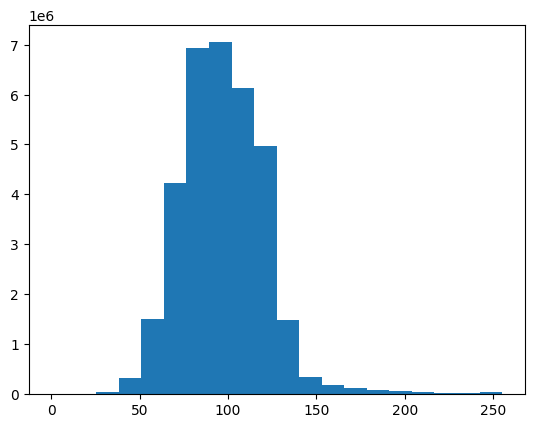

In [6]:
plt.hist(data_test.flatten(), bins = 20)
plt.show()

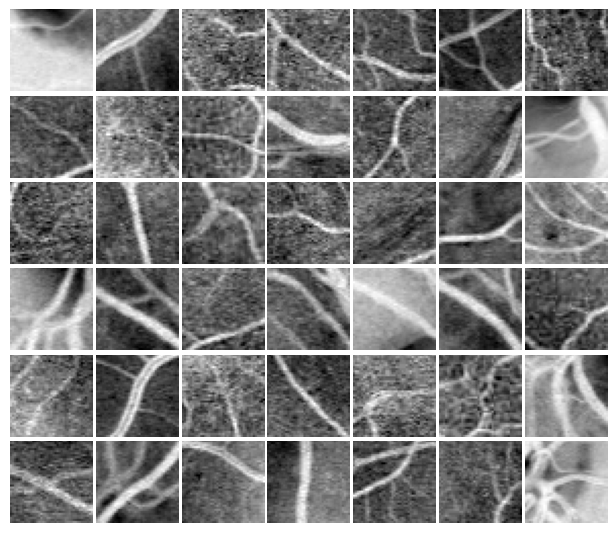

In [7]:
fig = plt.figure(figsize = (6, 6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.005)

l = np.random.randint(0, 20000, size = 42)
for i, j in enumerate(l):
	ax = fig.add_subplot(7, 7, i + 1)
	ax.imshow(data_test[j], cmap = 'binary')
	plt.axis('off')
plt.show()

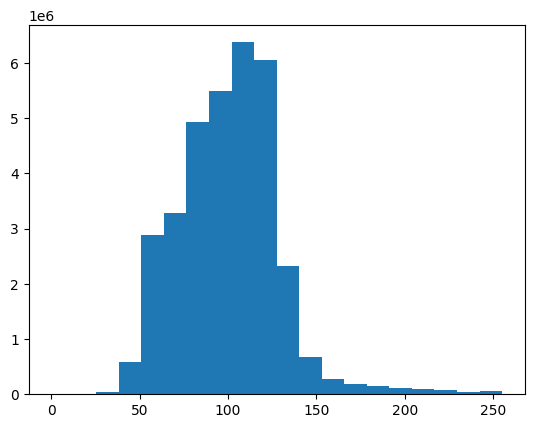

In [8]:
plt.hist(data_train.flatten(), bins = 20)
plt.show()

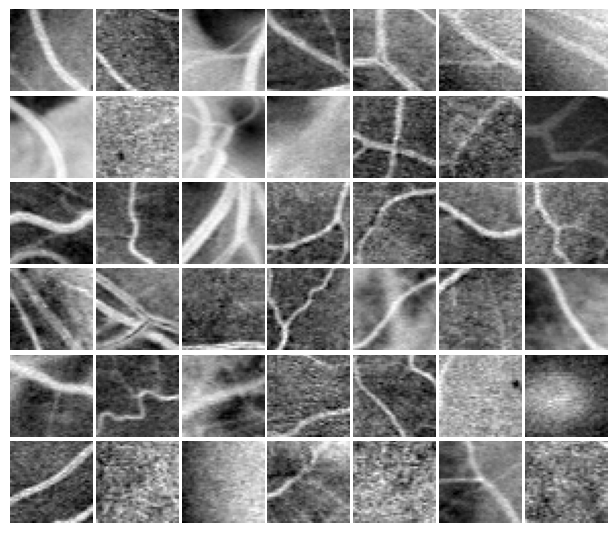

In [9]:
fig = plt.figure(figsize = (6, 6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.005)

l = np.random.randint(0, 20000, size = 42)
for i, j in enumerate(l):
	ax = fig.add_subplot(7, 7, i + 1)
	ax.imshow(data_train[j], cmap = 'binary')
	plt.axis('off')
plt.show()

In [10]:
import numpy as np
from tensorflow.keras.applications.densenet import DenseNet121
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras import regularizers
from sys import exit
import tensorflow as tf
from keras.applications import DenseNet121, MobileNetV3Large, InceptionV3
from keras.regularizers import l2
from keras.models import Model
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import  Input, Dense,Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, concatenate,Reshape

In [11]:
## reshaping and normalizing the data
## (27 * 27 * 3 = 2187) except green channel and clahe image (27 * 27 = 729) 
x_train = data_train.reshape(20000,41,41).astype('float')
x_test = data_test.reshape(20000,41,41).astype('float')

x_train /= 255
x_test /= 255

## modifying the label as catagorical
label_train = (label_train / 255).astype('int')
y_train = np_utils.to_categorical(label_train, 2)

label_test = (label_test / 255).astype('int')
y_test = np_utils.to_categorical(label_test, 2)


In [12]:
from keras.applications import MobileNetV3Small
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Définir l'architecture du modèle
model = MobileNetV3Small(input_shape=(41, 41, 1), include_top=True, weights=None, classes=2)

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Entraîner le modèle sur les données d'entraînement
history = model.fit(x_train, y_train, batch_size=128, epochs=200,verbose = 1, shuffle = False, validation_data = (x_test, y_test),callbacks=[early_stopping])

Epoch 1/200
157/157 [==============================] - 71s 371ms/step - loss: 0.7629 - accuracy: 0.2788 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/200
157/157 [==============================] - 55s 352ms/step - loss: 0.7135 - accuracy: 0.2501 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/200
157/157 [==============================] - 54s 346ms/step - loss: 0.7033 - accuracy: 0.3101 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/200
157/157 [==============================] - 52s 330ms/step - loss: 0.7024 - accuracy: 0.3440 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/200
157/157 [==============================] - 53s 339ms/step - loss: 0.6974 - accuracy: 0.3988 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/200
157/157 [==============================] - 51s 328ms/step - loss: 0.6987 - accuracy: 0.3913 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/200
157/157 [==============================] - 55s 349ms/step - loss: 0.6969 - accuracy: 0.4239 - val_loss: 0.6940 -

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Perte sur les données de test :', test_loss)
print('Précision sur les données de test :', test_acc)
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Perte sur les données d\'entraînement :', train_loss)
print('Précision sur les données d\'entraînement :', train_acc)

625/625 [==============================] - 28s 45ms/step - loss: 0.6940 - accuracy: 0.5000
Perte sur les données de test : 0.6940329074859619
Précision sur les données de test : 0.5
625/625 [==============================] - 29s 46ms/step - loss: 0.6940 - accuracy: 0.5000
Perte sur les données d'entraînement : 0.6940327882766724
Précision sur les données d'entraînement : 0.5
